# San Francisco city employee base salary prediction: Part2 - EDA and Inferential Statistics

## Content

1. Exploratory Data Analysis (EDA)
    1. Univariate Analysis
    2. Bivariate Analysis
    3. Insights from EDA
2. Inferential Statistics
    1. ANOVA 


### 1. Exploratory Data Analysis


In [18]:
#Import required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})

In [3]:
# Retrieve dataframe from SF Employe Compensation - 1. Data Munging notebook
%store -r df_final

In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148991 entries, 0 to 213201
Data columns (total 16 columns):
Year                   148991 non-null int64
Organization_Group     148991 non-null object
Department             148991 non-null object
Union                  148991 non-null object
Job_Family             148991 non-null object
Job                    148991 non-null object
Employee_Identifier    148991 non-null int64
Salaries               148991 non-null float64
Overtime               148991 non-null float64
Other_Salaries         148991 non-null float64
Total_Salary           148991 non-null float64
Retirement             148991 non-null float64
Health_Dental          148991 non-null float64
Other_Benefits         148991 non-null float64
Total_Benefits         148991 non-null float64
Total_Compensation     148991 non-null float64
dtypes: float64(9), int64(2), object(5)
memory usage: 19.3+ MB


In [5]:
df_final.describe(include='all')

,Year,Organization_Group,Department,Union,Job_Family,Job,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health_Dental,Other_Benefits,Total_Benefits,Total_Compensation
count,148991.000000,148991,148991,148991,148991,148991,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000
unique,NaN,7,56,73,58,1107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Public Works, Transportation & Commerce",DPH Public Health,"SEIU - Miscellaneous, Local 1021",Nursing,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50461,33885,35288,15011,10475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.053748,NaN,NaN,NaN,NaN,NaN,28471.438798,85115.088232,6176.949394,4811.295385,96103.333012,17089.302612,11858.061446,6254.188223,35201.552281,131304.885293
std,1.420289,NaN,NaN,NaN,NaN,NaN,16483.486843,35989.392875,13051.845005,7742.240920,43620.060399,7773.750259,2696.920595,3633.140472,11362.691809,53182.236296
min,2013.000000,NaN,NaN,NaN,NaN,NaN,1.000000,21906.330000,0.000000,0.000000,21927.250000,0.000000,0.000000,0.000000,54.880000,23145.080000
25%,2014.000000,NaN,NaN,NaN,NaN,NaN,14184.000000,59690.700000,0.000000,0.000000,64173.215000,12078.365000,11687.190000,3852.475000,29414.720000,93458.755000
50%,2015.000000,NaN,NaN,NaN,NaN,NaN,28439.000000,77922.020000,107.630000,1660.760000,86677.550000,16222.030000,12516.720000,5812.020000,35144.590000,122018.910000
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,42826.000000,107906.295000,6175.570000,6688.600000,121545.315000,21463.360000,13175.970000,7990.410000,41306.505000,163796.415000


In [6]:
print("After data cleaning, the dataframe has", df_final.shape[0], "rows and",df_final.shape[1],"columns")

After data cleaning, the dataframe has 148991 rows and 16 columns


### 1A. Univariate Analysis

- There are 7 organization groups with 56 departments. The departments come under only one organization group.
- *Transit Operator* is the most common job in SF city accounting to 7% of the total jobs
- *Nursing* is the most common job family (accounting to 10% of the total job families)
- Public health department has the highest number of jobs (22.7%) reported in 2013 - 2017
- Mean and median of the columns with numeric datatypes are not the same indicating non-symmetric distribution. 
- Median of base salary is less than its mean indicating positively skewed distribution. Except health/Dental, all other columns are postively skewed. 
- Health/Dental has the narrow distribution while total compensation has the widest distribution. 
- There are 77 unique Unions present with 'SEIU - Miscellaneous, Local 1021' occuring frequently (28.68%)
- There are 1107 unique job titles


In [7]:
df_final.describe(include='all')

,Year,Organization_Group,Department,Union,Job_Family,Job,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health_Dental,Other_Benefits,Total_Benefits,Total_Compensation
count,148991.000000,148991,148991,148991,148991,148991,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000,148991.000000
unique,NaN,7,56,73,58,1107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Public Works, Transportation & Commerce",DPH Public Health,"SEIU - Miscellaneous, Local 1021",Nursing,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50461,33885,35288,15011,10475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.053748,NaN,NaN,NaN,NaN,NaN,28471.438798,85115.088232,6176.949394,4811.295385,96103.333012,17089.302612,11858.061446,6254.188223,35201.552281,131304.885293
std,1.420289,NaN,NaN,NaN,NaN,NaN,16483.486843,35989.392875,13051.845005,7742.240920,43620.060399,7773.750259,2696.920595,3633.140472,11362.691809,53182.236296
min,2013.000000,NaN,NaN,NaN,NaN,NaN,1.000000,21906.330000,0.000000,0.000000,21927.250000,0.000000,0.000000,0.000000,54.880000,23145.080000
25%,2014.000000,NaN,NaN,NaN,NaN,NaN,14184.000000,59690.700000,0.000000,0.000000,64173.215000,12078.365000,11687.190000,3852.475000,29414.720000,93458.755000
50%,2015.000000,NaN,NaN,NaN,NaN,NaN,28439.000000,77922.020000,107.630000,1660.760000,86677.550000,16222.030000,12516.720000,5812.020000,35144.590000,122018.910000
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,42826.000000,107906.295000,6175.570000,6688.600000,121545.315000,21463.360000,13175.970000,7990.410000,41306.505000,163796.415000


In [8]:
# One department comes under only one organization
df_final.groupby('Department')['Organization_Group'].unique()

Department
AAM Asian Art Museum                                  [Culture & Recreation]
ADM Gen Svcs Agency-City Admin            [General Administration & Finance]
ADP Adult Probation                                      [Public Protection]
AIR Airport Commission             [Public Works, Transportation & Commerce]
ART Arts Commission                                   [Culture & Recreation]
ASR Assessor / Recorder                   [General Administration & Finance]
BOA Board Of Appeals - PAB         [Public Works, Transportation & Commerce]
BOS Board Of Supervisors                  [General Administration & Finance]
CAT City Attorney                         [General Administration & Finance]
CFC Children & Families Commsn    [Human Welfare & Neighborhood Development]
CHF Children;Youth & Families     [Human Welfare & Neighborhood Development]
CII Commty Invest & Infrstrctr    [Human Welfare & Neighborhood Development]
CON Controller                            [General Administration

In [9]:
# How many departments are present under one organization? 
df_final.groupby('Organization_Group')['Department'].nunique()

Organization_Group
Community Health                             1
Culture & Recreation                         8
General Administration & Finance            15
General City Responsibilities                1
Human Welfare & Neighborhood Development    10
Public Protection                            9
Public Works, Transportation & Commerce     12
Name: Department, dtype: int64

Text(0.5,0,'Department')

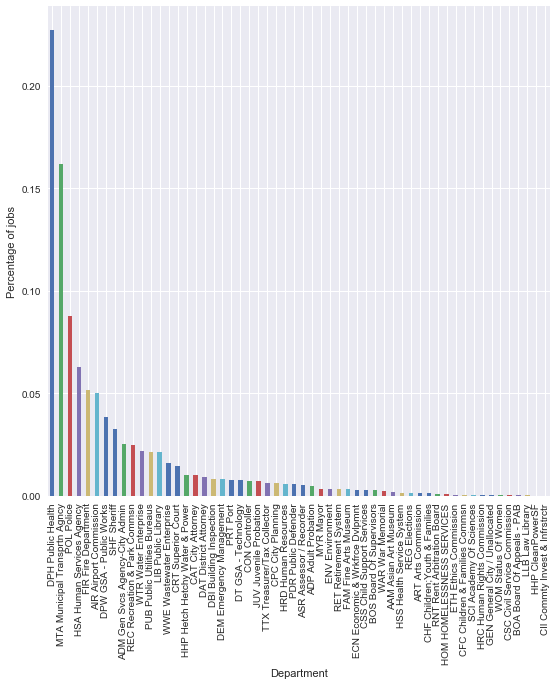

In [21]:
# Number of records per department

df_final.Department.value_counts(normalize=True).plot(kind='bar', figsize = (9,9))
plt.ylabel("Percentage of jobs")
plt.xlabel("Department")

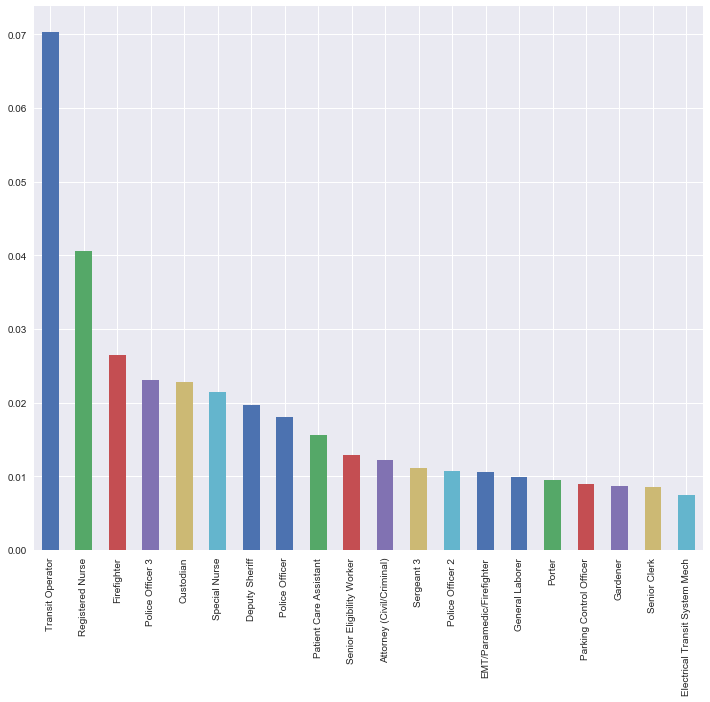

In [22]:
# Number of records per job
df_final.Job.value_counts(normalize = True).sort_values(ascending=True).nlargest(20).plot(kind='bar')

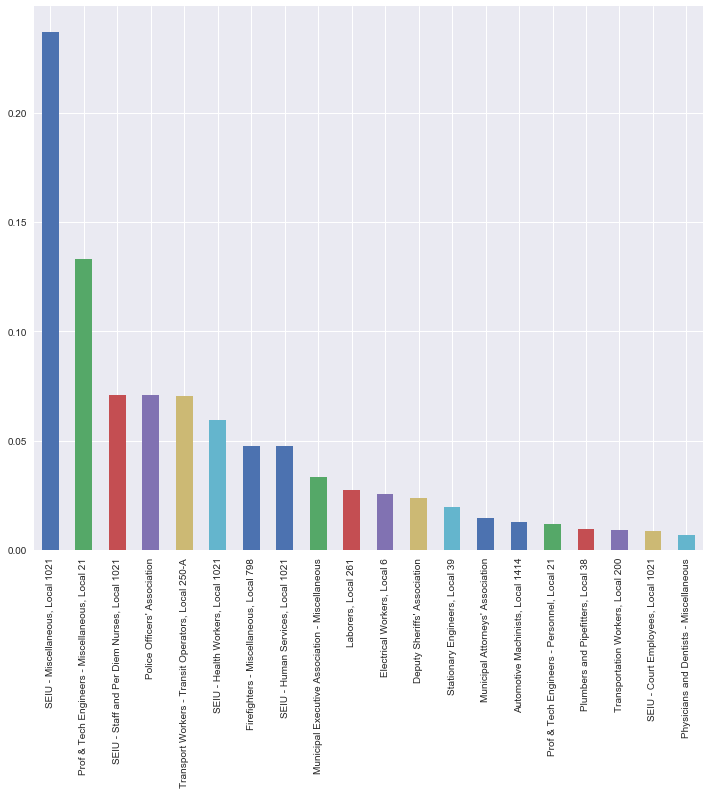

In [20]:
# Number of records per union
df_final.Union.value_counts(normalize = True).sort_values(ascending=True).nlargest(20).plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

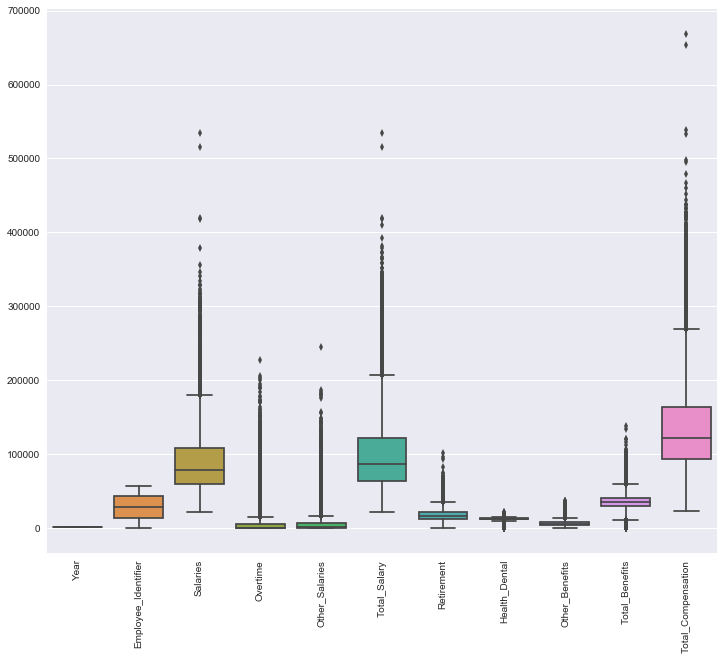

In [19]:
# Data distribution of numerical data types in the dataset: Total_compensation has the widest distribution while health/dental has a tight distribution
#df_final.boxplot(figsize=(9,9), rot = 90)
sns.boxplot(data=df_final)
plt.xticks(rotation=90)
#plt.figure(figsize=(15,8))

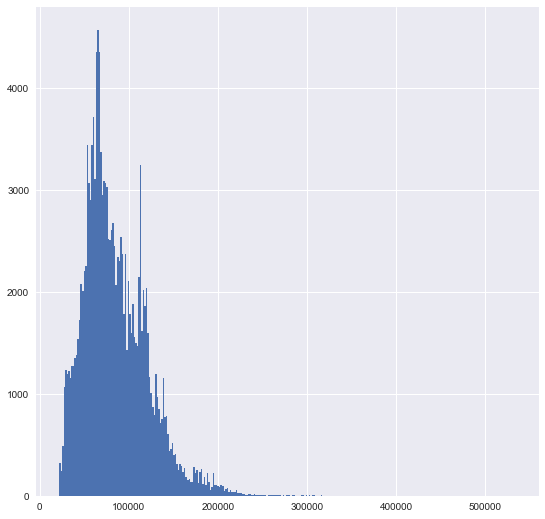

In [23]:
#positively skewed distribution
df_final.Salaries.hist(bins = 300, figsize=(9,9))

### 1C. Bivariate Analysis

**Linear correlation:**

- Retirement and salary are linearly related with correlation coefficient of 0.89
- Salary and total benefit (retirement, health_dental and other benefits) are linearly related with correlation coefficient of 0.87
- Salaries and Retirement are linearly correlated to total compensation with a pearson coefficient of 0.94 and 0.91. -- Does that mean these two parameters has a dominant influence on total compensation? So, by predicting salary, retirement can be obtained. And can total compensation be predicted from that?

Remember that 
 - Total Salary = Salaries + Overtime + Other_Salaries
 - Total Benefits = Retirement + health_Dental + Other benefits
 - Total Compensation = Total Salary + Total Benefits


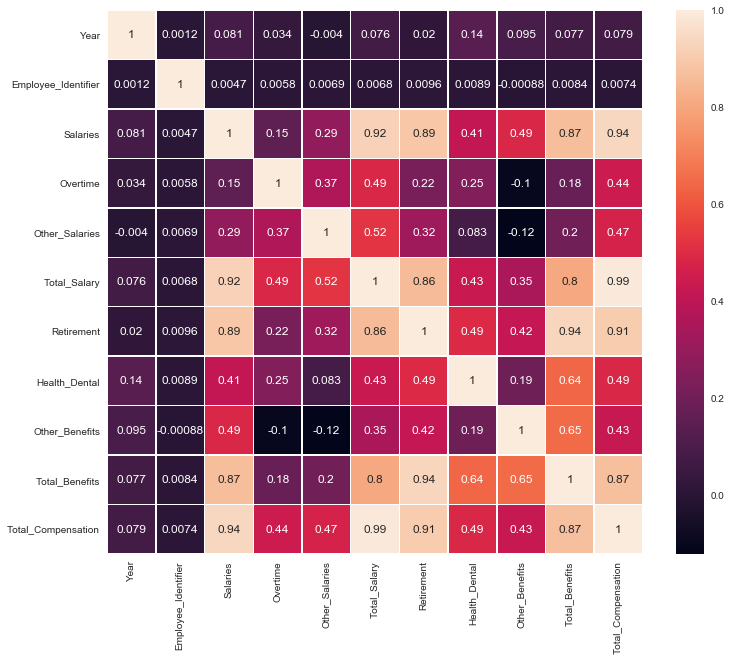

In [24]:
#Is there a linear correlation between columns in the database?
sns.heatmap(df_final.corr(), linewidths=.5, annot = True)
plt.figure(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0d61d630>,
      dtype=object)

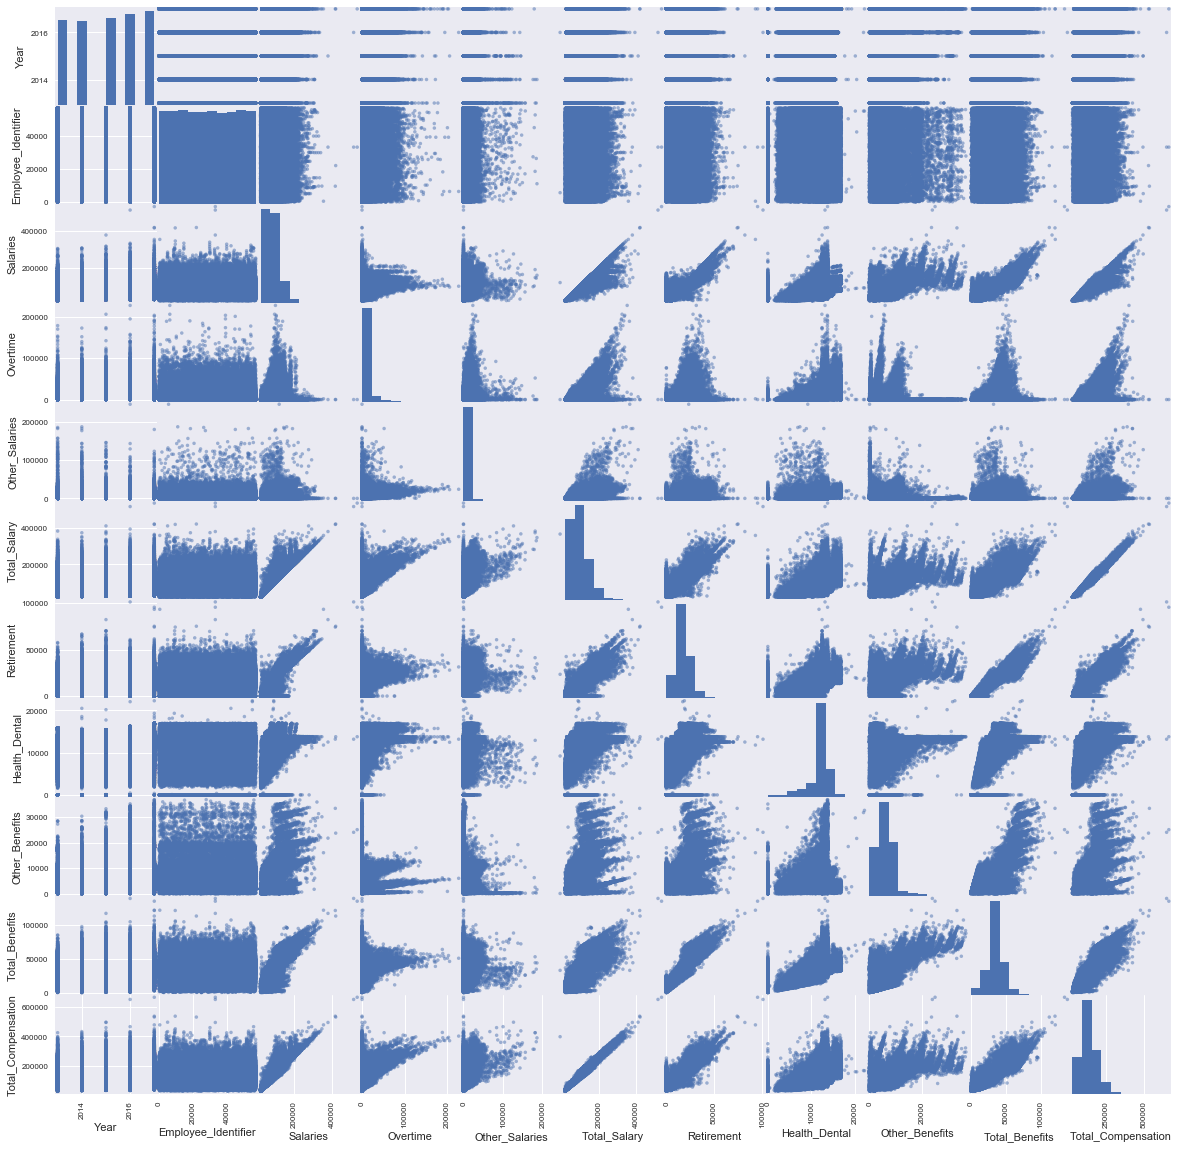

In [20]:
#Is there a non-linear relationship that can be interpreted by visualization?
pd.plotting.scatter_matrix(df_final, figsize=(20,20))

In [32]:
# Base salary vs overtime
#plt.scatter(df_final.Salaries, df_final.Overtime)

### 1C. Other insights from data

- Chief Investment Officer from 'Retirement System' department in 'General Administration & Finance' gets the highest base salary. 585% higher than SF city median salary ($77922.02)
- 'General Administration & Finance' organization pays the highest median salary 88658.882452 (13.7% higher than city median base salary)
- Median base salary of SF city employees increases linearly.
- There are only 30 records in 'General City Responsibilities' organization with a very tight base salary distribution. Might be overlooked in the model. Attention has to be provided in feature engineering

In [28]:
#Who gets the highest salary
df_final.loc[df_final.Salaries.idxmax()]

Year                                                              2017
Organization_Group                    General Administration & Finance
Department                                       RET Retirement System
Union                  Municipal Executive Association - Miscellaneous
Job_Family                               Administrative & Mgmt (Unrep)
Job                                           Chief Investment Officer
Employee_Identifier                                              33145
Salaries                                                        533986
Overtime                                                             0
Other_Salaries                                                       0
Total_Salary                                                    533986
Retirement                                                       95600
Health_Dental                                                  13765.5
Other_Benefits                                                 25060.9
Total_

In [36]:
#Record with highest base salary per year
max_bs = df_final.groupby('Year', as_index=False)['Salaries'].idxmax().tolist()
df_final.loc[max_bs]

,Year,Organization_Group,Department,Union,Job_Family,Job,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health_Dental,Other_Benefits,Total_Benefits,Total_Compensation
121493,2013,Public Protection,POL Police,Municipal Executive Association - Police,Management,Chief Of Police,55717,305942.01,0.0,19175.68,325117.69,57578.36,12828.16,1741.98,72148.50,397266.19
40845,2014,Public Protection,POL Police,Municipal Executive Association - Police,Management,Chief Of Police,55717,308632.51,0.0,19340.35,327972.86,66644.07,12516.73,6099.99,85260.79,413233.65
16244,2015,General Administration & Finance,RET Retirement System,Municipal Executive Association - Miscellaneous,Administrative & Mgmt (Unrep),Chief Investment Officer,33145,379201.70,0.0,0.00,379201.70,82274.98,12501.46,21743.36,116519.80,495721.50
34258,2016,General Administration & Finance,RET Retirement System,Municipal Executive Association - Miscellaneous,Administrative & Mgmt (Unrep),Chief Investment Officer,33145,515101.80,0.0,0.00,515101.80,101306.01,13175.97,24021.54,138503.52,653605.32
77506,2017,General Administration & Finance,RET Retirement System,Municipal Executive Association - Miscellaneous,Administrative & Mgmt (Unrep),Chief Investment Officer,33145,533985.94,0.0,0.00,533985.94,95600.00,13765.55,25060.92,134426.47,668412.41


In [139]:
# Median base salary
print("The median base salary of SF city employees is:", df_final.Salaries.median())
print("How much does chief investment officer base salary is higher than median salary?",((df_final.Salaries.median()-df_final.Salaries.max())/df_final.Salaries.median())*100)

The median base salary of SF city employees is: 77922.02
How much does chief investment officer base salary is higher than median salary? -585.2824657266327


Median base salary per year:


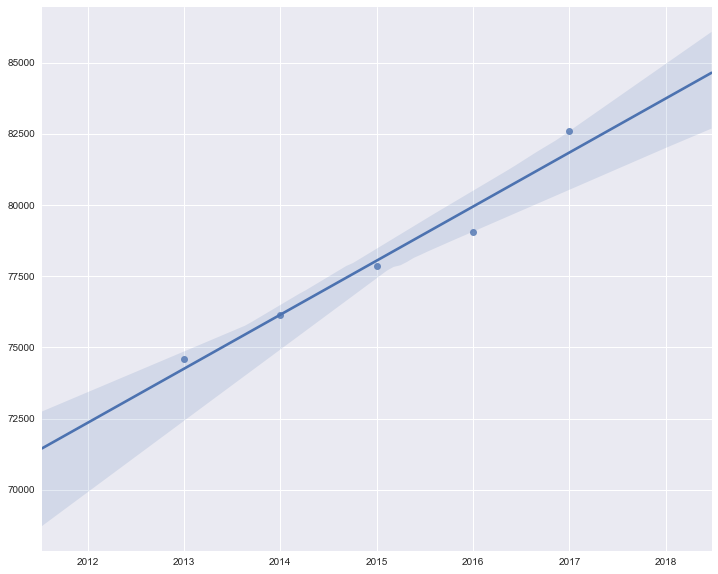

In [141]:
# Median base salary per year
print("Median base salary per year:")
sal_median = df_final.groupby('Year')['Salaries'].median()
sal_median_x = sal_median.index.values
sal_median_y = sal_median.values
sns.regplot(x=sal_median_x, y=sal_median_y, ci=95, fit_reg = True)


In [142]:
# Linear regression fit of base salary vs year
from scipy.stats import linregress
linregress(sal_median_x,sal_median_y)

LinregressResult(slope=1899.1345000000001, intercept=-3748707.9725, rvalue=0.9801283001282788, pvalue=0.0033526453483969897, stderr=221.90972837301118)

In [ ]:
#How much does SF city has spent for employee compensation in the years 2013 - 2017? How has it changed over the years? 

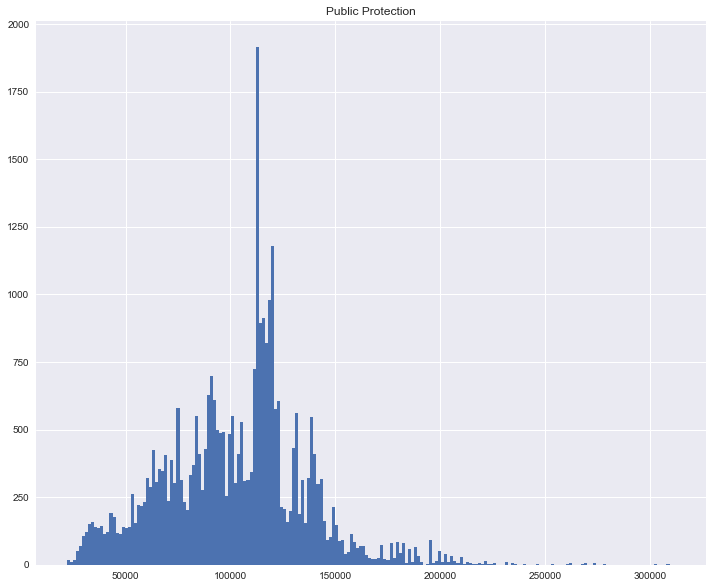

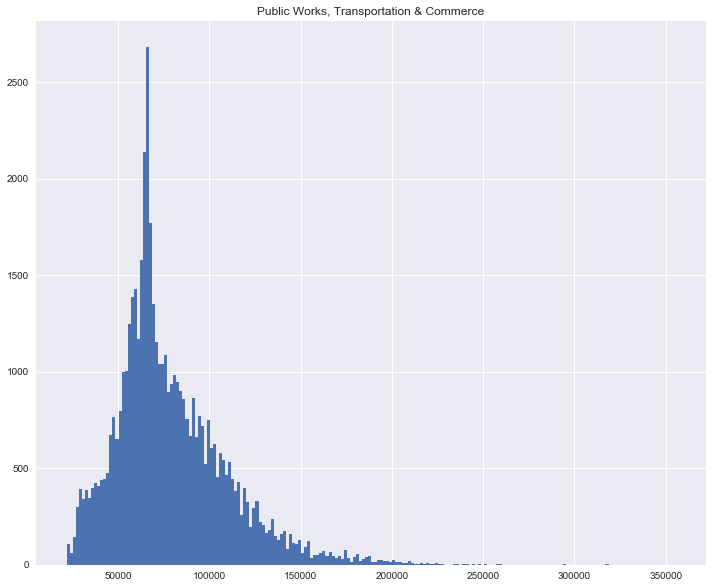

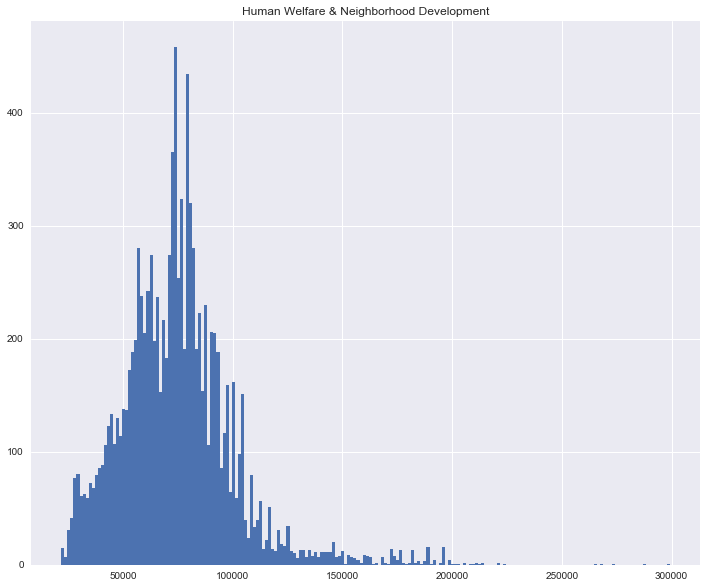

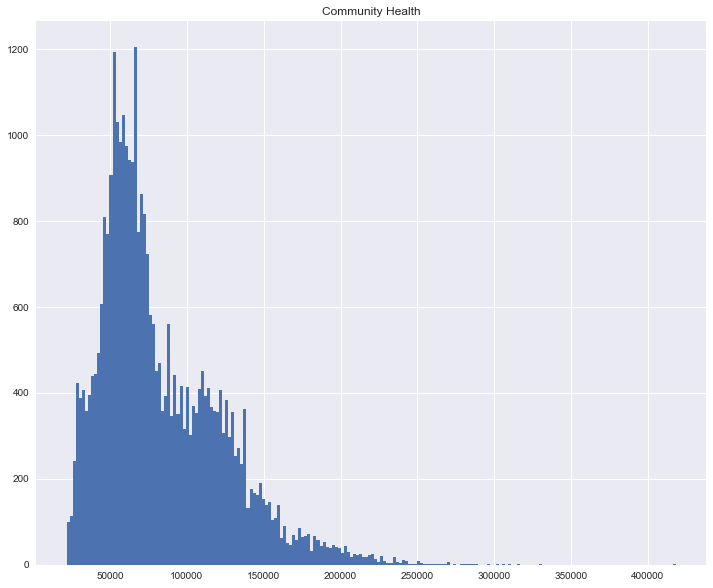

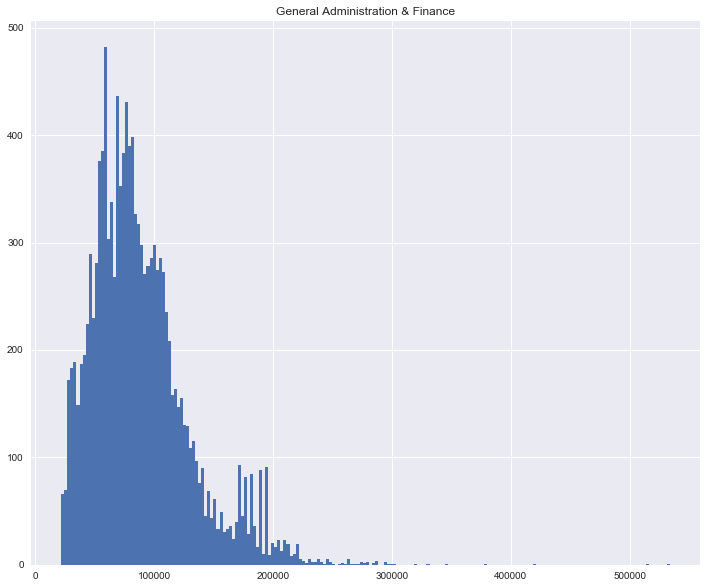

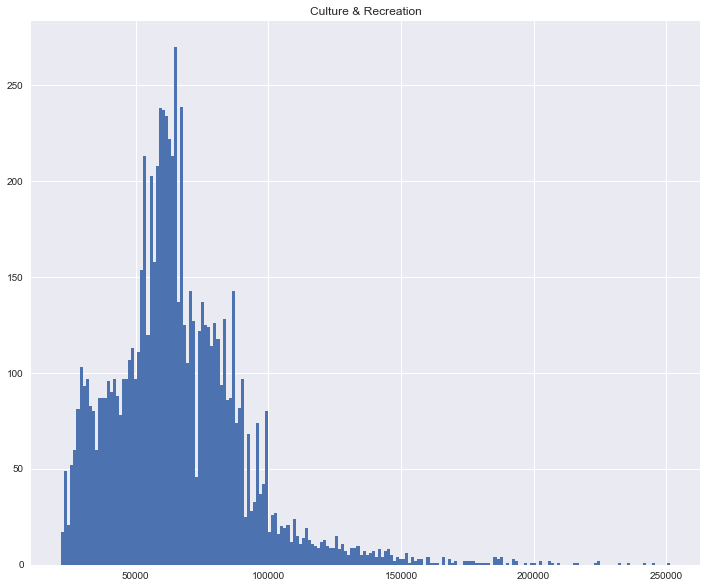

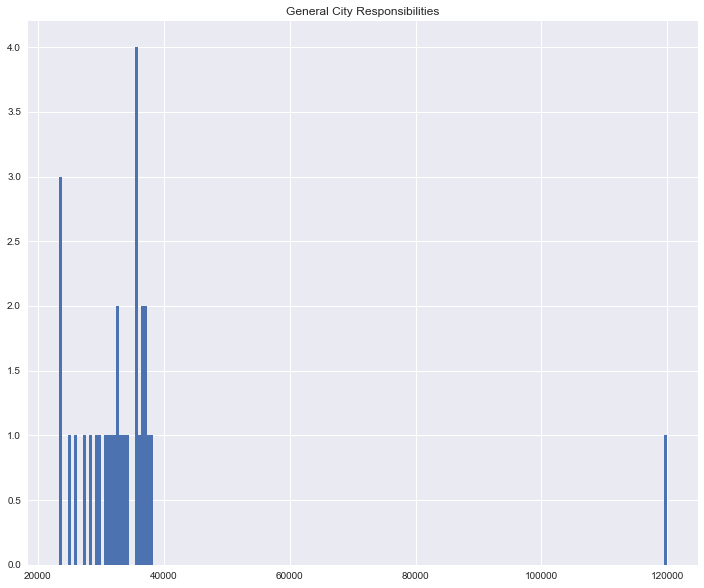

In [37]:
# Base salary distribution within organization

for i in df_final.Organization_Group.unique():
    df_final.query('Organization_Group ==  ' + '"' + i + '"')['Salaries'].hist(bins=200)
    plt.title(i)
    plt.show()

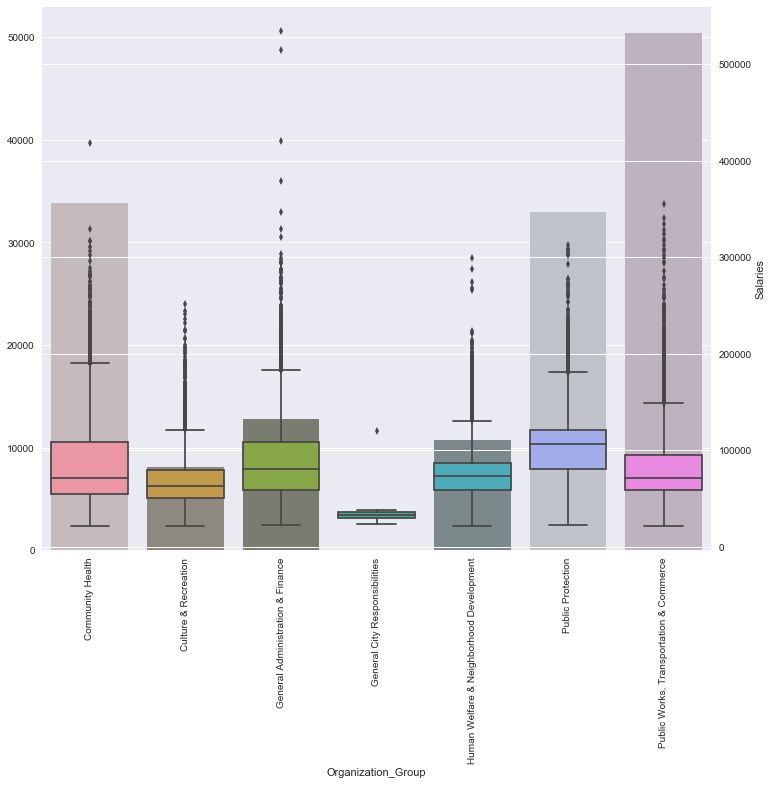

In [92]:
# Which Organization spends most in base salary for employees?

#df_final.boxplot(column='Salaries', by = ', rot = 90)

sns.barplot(x=df_final.groupby('Organization_Group')['Salaries'].count().index, y= df_final.groupby('Organization_Group')['Salaries'].count().values, saturation = 0.1)
plt.xticks(rotation=90)
ax2 = plt.twinx()
#sns.barplot(data=df.column2, color="b", ax=ax2)
sns.boxplot(x='Organization_Group', y ='Salaries', data=df_final.sort_values('Organization_Group'), ax=ax2)

In [147]:
# Descriptive statistics of base salary grouped by organization

df_final.groupby('Organization_Group')['Salaries'].describe()

,count,mean,std,min,25%,50%,75%,max
Organization_Group,,,,,,,,
Community Health,33885.0,83455.883324,39993.120389,21906.33,54321.5100,71493.760,108641.7100,418016.62
Culture & Recreation,8138.0,66090.031455,25494.678936,21911.05,50817.6775,63020.505,79161.6425,251456.38
General Administration & Finance,12780.0,88658.882452,42030.923231,21969.26,58863.2025,80903.755,108411.4150,533985.94
General City Responsibilities,30.0,35005.394333,16679.885478,23270.40,29464.9425,33064.625,35934.9775,120000.00
Human Welfare & Neighborhood Development,10771.0,74871.723256,26368.126707,21927.25,58309.1200,73415.730,87220.5350,299287.79
Public Protection,32926.0,102744.687122,33887.724881,21952.63,80394.4925,106168.605,120613.0100,312390.90
"Public Works, Transportation & Commerce",50461.0,79112.844562,31211.002179,21911.21,59235.1100,71522.930,95244.9000,355340.57


In [146]:
((df_final.Salaries.median()-88658.882452)/df_final.Salaries.median())*100

-13.778983722444568

# Inferential Statistics

# Is the mean salary for account clerk same over the organization? 
# Perform Analysis of variance (ANOVA)

To perform ANOVA, following conditions should be met: 

1. Base salary of every accountant should be independent within a group and across organization groups
2. Base salary within every group to be analyzed should be normally distributed
3. The variablity of base salary across groups should be about equal

Our data for account clerk:
Does not satisfy rule #2 and rule #3. So, ANOVA cannot be performed
Checking on Rule #2: scipy stats normal test p value indicates the probability that the larger value of Chi2 will be seen. It is very low indicated that the data is unlikely to be normally distributed. 
--> Cannot satisfy the rules of ANOVA and therefore ANOVA cannot be performed.



There are 7 unique organization groups and 56 unique departments. Some jobs come under multiple organizations:
There are 314 jobs which comes under multiple organizations.
There are 37 jobs that fall under 6 organizations. 
2 jobs were sampled from them and tested for ANOVA. 


In [29]:
df_final.Organization_Group.unique()

array(['Public Protection', 'Public Works, Transportation & Commerce',
       'Human Welfare & Neighborhood Development', 'Community Health',
       'General Administration & Finance', 'Culture & Recreation',
       'General City Responsibilities'], dtype=object)

In [30]:
Jobs_mult_org_sampled.index[0]

NameError: name 'Jobs_mult_org_sampled' is not defined

In [135]:
#Collect data by group

anova_grp_CH = df.loc[((df['Job'] == Jobs_mult_org_sampled.index[0]) & (df['Organization_Group'] == "Community Health"))]['Salaries']
anova_grp_CR = df.loc[((df['Job'] == Jobs_mult_org_sampled.index[0]) & (df['Organization_Group'] == "Culture & Recreation"))]['Salaries']
anova_grp_PWTC = df.loc[((df['Job'] == Jobs_mult_org_sampled.index[0]) & (df['Organization_Group'] == "Public Works, Transportation & Commerce"))]['Salaries']
anova_grp_PP = df.loc[((df['Job'] == Jobs_mult_org_sampled.index[0]) & (df['Organization_Group'] == "Public Protection"))]['Salaries']
anova_grp_GAF = df.loc[((df['Job'] == Jobs_mult_org_sampled.index[0]) & (df['Organization_Group'] == "General Administration & Finance"))]['Salaries']
anova_grp_HWND = df.loc[((df['Job'] == Jobs_mult_org_sampled.index[0]) & (df['Organization_Group'] == "Human Welfare & Neighborhood Development"))]['Salaries']
anova_grp_GCR = df.loc[((df['Job'] == Jobs_mult_org_sampled.index[0]) & (df['Organization_Group'] == "General City Responsibilities"))]['Salaries']

anova_grp = {'CH': anova_grp_CH, 'CR': anova_grp_CR, 'PWTC': anova_grp_PWTC,'PP': anova_grp_PP,'GAF': anova_grp_GAF, 'HWND': anova_grp_HWND, 'GCR': anova_grp_GCR}

# Rule 2. Is the data normally distributed within each group?
import scipy.stats as stats

for k,v in anova_grp.items():
    if len(v)>0:
        print(k,":", stats.normaltest(v.values))



CH : NormaltestResult(statistic=31.165916593590424, pvalue=1.7076827834858157e-07)
CR : NormaltestResult(statistic=23.04967912610329, pvalue=9.881565937634273e-06)
PWTC : NormaltestResult(statistic=101.73248720245716, pvalue=8.110938133958664e-23)
PP : NormaltestResult(statistic=19.581784537848055, pvalue=5.5958944561989594e-05)
GAF : NormaltestResult(statistic=25.381551050977755, pvalue=3.0794007996023863e-06)
HWND : NormaltestResult(statistic=9.42540724659376, pvalue=0.008980464936908485)


How much does median salary increase per year?

In [225]:
# Median salary per annum
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

#df.boxplot(column = 'Salaries', by = 'Year', figsize =(10,10), vert = False, boxprops = boxprops, medianprops = medianprops, showmeans=True)
#df.groupby('Year').count()
df_final.groupby('Year')['Salaries'].median()

Year
2013    74573.500
2014    76126.200
2015    77874.980
2016    79066.545
2017    82599.000
Name: Salaries, dtype: float64

In [31]:
# Which department spends most in base salary for employees?

df_final.groupby('Department')['Salaries'].sum().sort_values()

Department
HHP CleanPowerSF                  8.605877e+04
GEN General City / Unallocated    3.835619e+05
HOM HOMELESSNESS SERVICES         6.451747e+05
LLB Law Library                   1.426860e+06
BOA Board Of Appeals - PAB        1.831806e+06
WOM Status Of Women               2.447393e+06
CSC Civil Service Commission      2.479747e+06
HRC Human Rights Commission       4.423887e+06
SCI Academy Of Sciences           4.660712e+06
CFC Children & Families Commsn    5.237259e+06
ETH Ethics Commission             6.078764e+06
ART Arts Commission               1.266982e+07
CHF Children;Youth & Families     1.410802e+07
RNT Rent Arbitration Board        1.643251e+07
REG Elections                     1.679436e+07
HSS Health Service System         1.886165e+07
AAM Asian Art Museum              1.896552e+07
WAR War Memorial                  2.243963e+07
BOS Board Of Supervisors          3.133290e+07
CSS Child Support Services        3.215854e+07
ENV Environment                   3.451668e+07
FA

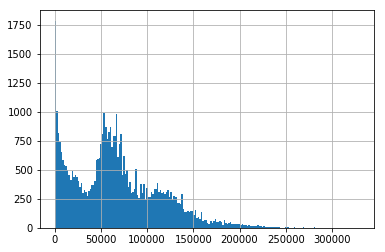

In [32]:
# Public spends the largest amount in the past 5 years for employee base salary. How does the base salary of public health distributed?

df_final.query('Department == "DPH Public Health"')["Salaries"].hist(bins = 200)

# Excluding the peak at 0, it is a bimodal distribution. one arounf 50,k and next one near 100k. 

In [33]:
df_final.query('Organization_Group == "Community Health"')["Department"].unique()

array(['DPH Public Health'], dtype=object)

In [34]:
# Total number of jobs (# records) per department and organization
df_final.groupby(['Organization_Group','Department'])['Job'].count()

Organization_Group                        Department                    
Community Health                          DPH Public Health                 43273
Culture & Recreation                      AAM Asian Art Museum                396
                                          ART Arts Commission                 181
                                          FAM Fine Arts Museum               1235
                                          LIB Public Library                 4334
                                          LLB Law Library                      11
                                          REC Recreation & Park Commsn      11019
                                          SCI Academy Of Sciences              66
                                          WAR War Memorial                    438
General Administration & Finance          ADM Gen Svcs Agency-City Admin     4491
                                          ASR Assessor / Recorder             715
                         

In [35]:
# Total number of unique jobs per department and organization
df_final.groupby(['Organization_Group','Department'])['Job'].nunique()

Organization_Group                        Department                    
Community Health                          DPH Public Health                 276
Culture & Recreation                      AAM Asian Art Museum               19
                                          ART Arts Commission                20
                                          FAM Fine Arts Museum               20
                                          LIB Public Library                 79
                                          LLB Law Library                     2
                                          REC Recreation & Park Commsn      129
                                          SCI Academy Of Sciences             3
                                          WAR War Memorial                   28
General Administration & Finance          ADM Gen Svcs Agency-City Admin    170
                                          ASR Assessor / Recorder            46
                                          BOS B